In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re


In [34]:
df = pd.read_csv("./cleaned_main_dataset.csv")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

In [35]:
remove_all_non_alpha_regex = re.compile("[^a-zA-Z ]")

In [36]:
df["Product description"] = df["Product description"].apply(
    lambda x: remove_all_non_alpha_regex.sub("", x).lower()
)
df["Lineitem name"] = df["Lineitem name"].apply(
    lambda x: remove_all_non_alpha_regex.sub("", x).lower()
)
df = df[~(df["Product description"] == "")]


In [37]:
len(df)

7504

In [38]:
df.head(5)

,Email,Lineitem name,Lineitem sku,Product description
0,30cf6c31baa03a1c5872cfb2ab85ea1abf124c3b,the victoria bouquet,OBVBUN1410,mini bouquet spesial dari outerbloom terdiri d...
1,ab6fce12a23cb7ffe3c2bf1e8515e52118a3170e,gentle soul jabodetabek,JKTDUK1030,papan bunga untuk ucapan duka cita desain terb...
2,b548ebfc66a66540846b6f73ec6f1290be31c8c4,aia papan bunga condolences l,AIAPPB1024,papan bunga untuk ucapan duka cita desain terb...
3,9091f644260c73912b8c0c37b8d84d5cea0af86d,endearing ruby,OBVSTF1015,rangkaian bunga untuk ucapan congratulations s...
4,b63bd66834f8e9d1e9da1008c8f8725bdb4f0039,sweet bright,OBVBUA1018,parsel buahbuahan premium dari outerbloom terd...


<AxesSubplot: >

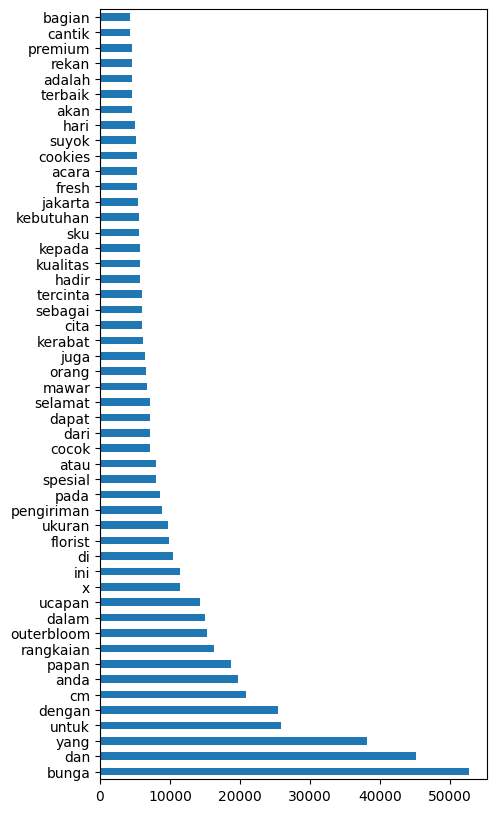

In [39]:
word_freq = df["Product description"].str.split(expand=True).stack().value_counts().sort_values(ascending=False)

word_freq[:50].plot(figsize=(5, 10),kind="barh")

In [40]:
common_words = ["outerbloom", "x", "cm", "mm", "sku"]


def remove_common_words(description: str):
    tmp_desc = description

    for word in common_words:
        tmp_desc = tmp_desc.replace(word, "")

    return tmp_desc


df["Product description"] = df["Product description"].apply(
    remove_common_words
)

df["Product description"].head(5)


0    mini bouquet spesial dari  terdiri dari  mawar...
1    papan bunga untuk ucapan duka cita desain terb...
2    papan bunga untuk ucapan duka cita desain terb...
3    rangkaian bunga untuk ucapan congratulations s...
4    parsel buahbuahan premium dari  terdiri atas p...
Name: Product description, dtype: object

In [41]:
len(df)

7504

<AxesSubplot: >

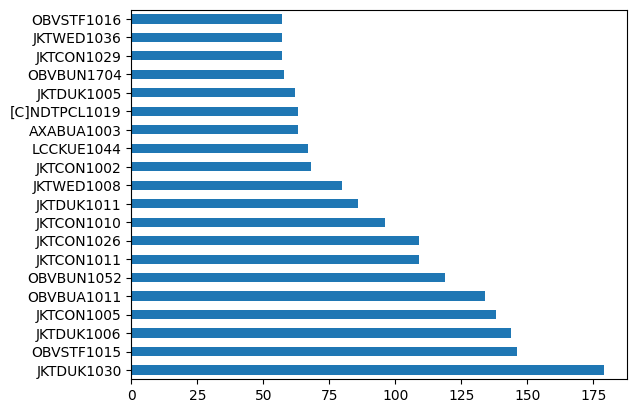

In [42]:
unique_lineitem = df["Lineitem sku"].value_counts()
unique_lineitem[:20].sort_values(ascending=False).plot(kind="barh")


In [43]:
print("Unique product bought:", len(unique_lineitem))
print("% of total products:", (len(unique_lineitem) / 3724) * 100)


Unique product bought: 1240
% of total products: 33.297529538131045
